In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [15]:
data_train_path = 'train'
data_test_path = 'test'
data_val_path = 'validation'

In [16]:
img_width = 180
img_height =180 

In [17]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [23]:
data_cat = data_train.class_names

In [52]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [20]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [21]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


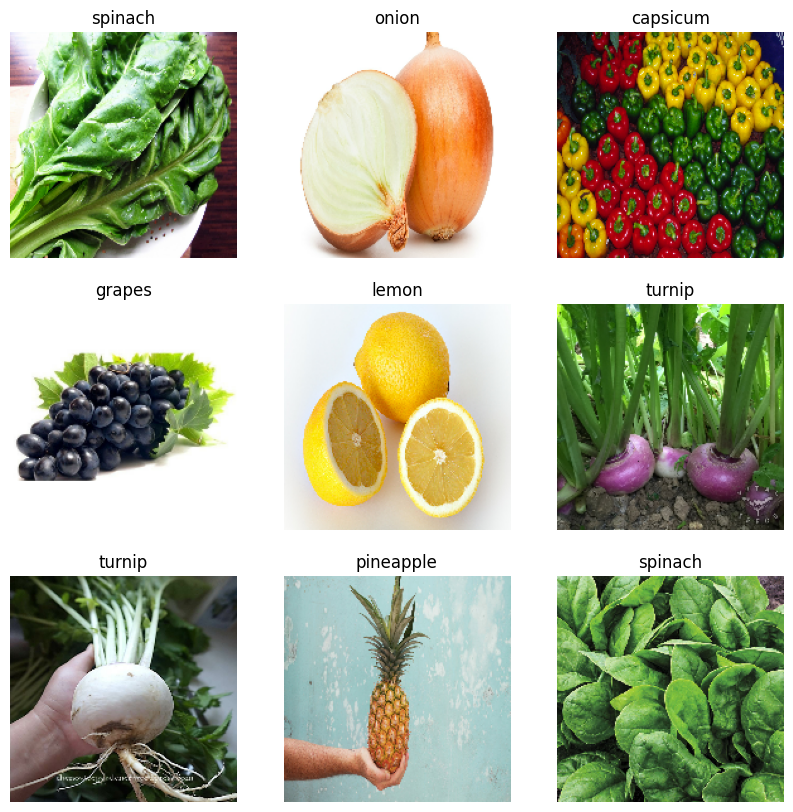

In [25]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [29]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - accuracy: 0.0607 - loss: 4.0246 - val_accuracy: 0.3077 - val_loss: 2.5742
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.2419 - loss: 2.6917 - val_accuracy: 0.5328 - val_loss: 1.6701
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 194ms/step - accuracy: 0.4358 - loss: 1.9886 - val_accuracy: 0.7664 - val_loss: 1.0823
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.6333 - loss: 1.2928 - val_accuracy: 0.8348 - val_loss: 0.7555
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.7953 - loss: 0.7361 - val_accuracy: 0.9003 - val_loss: 0.8214
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - accuracy: 0.8790 - loss: 0.4635 - val_accuracy: 0.9031 - val_loss: 0.7743
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8956 - loss: 0.3978 - val_accuracy: 0.9487 - val_loss: 0.3563
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.9418 - loss: 0.2375 - val_accu

Text(0.5, 1.0, 'Loss')

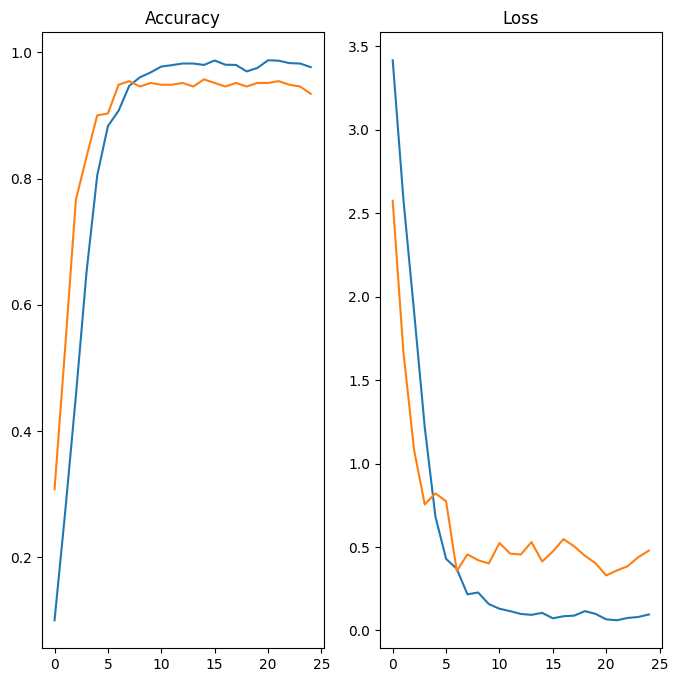

In [32]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [45]:
image = 'Chilli.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [46]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [47]:
score = tf.nn.softmax(predict)

In [48]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is paprika with accuracy of 99.69


In [51]:
model.save('Image_classify.keras')